# Project by:

Ariel Oren | 4arielo@gmail.com | 052-631-3991

The ability to process monitored data (the data measured from the biological process) in real time and react accordingly. One of the main parameters in the monitored data is the Dissolved Oxygen ("DO") that describes the Oxygen levels inside the fermenter. The DO follows a known pattern – it starts at 100%, decreases for a while and then peaks.
i collected DO samples from five different experiments saved as a python dictionary in the following way:

['X_DO'] – contains the DO samples of experiment X

['X_Time'] – contains the corresponding time of each DO sample.

The next algorithm ,  receive DO samples of an experiment and will return the time of the first significant DO jump.
The algorithm return the results graphically, in a different graph for each experiment.

# Libraries 

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
# import argparse

# Functions

In [240]:
def plot_experimet_result(DO_series, time_series, DO_name, time_name, K):    
    '''
        -- DO_series: series contains the DO sampling
        -- time_series: series contains the corresponding time of the DO sampling
        -- DO_name: the current DO experiment number
        -- time_name: the current Time experiment number
        -- K: hyperparameter which decide how many DO jumps to pick into the largest jumps group, for exaple: 
            Default value which is set to 5 will save the 5 largest DO jumps. If K was 10, it would save the 10 largest DO jumps.
    '''
    
    #creating Dataframe of every experiment - DO sampling and the time of the sampling
    df = pd.concat([DO_series, time_series], axis=1)
    df = df.rename(columns={"DO": DO_name, "Time": time_name}) 
    
    df['delta']=df[DO_name].diff(periods=1) # create new column which hold the differnce values consecutive samples
    
    max_values = df.sort_values(by=['delta'],ascending=False)[:K] # get the K'st largest jump values
    max_value_by_time = max_values.sort_values(by=[time_name], ascending=True)[:1] 
    chosen_time = int(max_value_by_time[time_name])
        
    df["color"] = np.where(df[time_name]==chosen_time, "red", "blue") # Coloring the chosen time point in red
    df.plot(x=time_name , y=DO_name, kind="scatter", color=df["color"])
    plt.title( DO_name + " Over " + time_name)
    plt.xlabel(time_name + " [Minutes]")
    plt.ylabel(DO_name + " [%]")

In [241]:
def do_over_time(do_pickle_file_path, K=5):
        '''
        -- do_pickle_file_path: path to DO pickle file
        -- K: hyperparameter which decide how many DO jumps to pick into the largest jumps group, for exaple: 
            Default value which is set to 5 will save the 5 largest DO jumps. If K was 10, it would save the 10 largest DO jumps.
    '''
    do_pkl = pickle.load(open(do_pickle_file_path,"rb"))
    
    keys_list=list(do_pkl.keys())
    time_list = keys_list[1::2] # Elements from list1 starting from 1 iterating by 2
    do_list = keys_list[::2] # Elements from list1 starting from 0 iterating by 2

    for do, time in zip(do_list, time_list):
        s1 = do_pkl[do]
        s2 = do_pkl[time]
        DO_name = do
        time_name = time
        plot_experimet_result(s1, s2, DO_name, time_name, K)

# Run

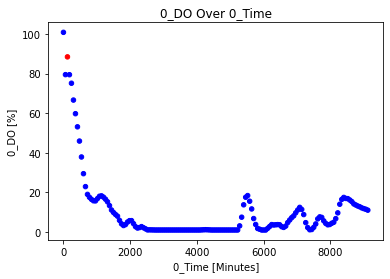

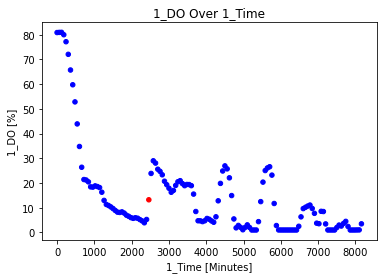

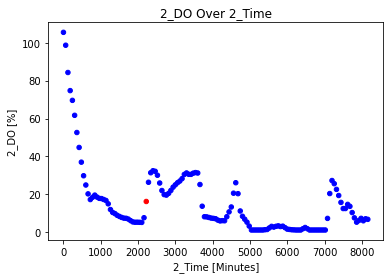

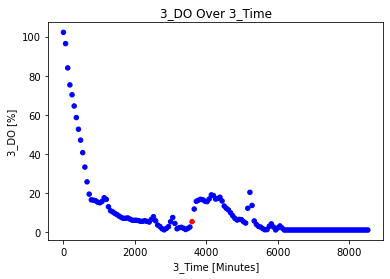

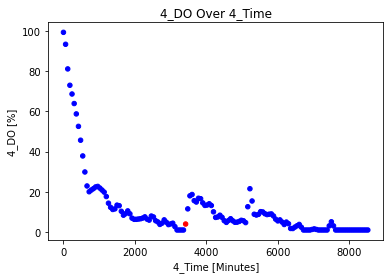

In [243]:
do_pickle_file_path = 'DO_jump' # Insert the relevant DO pickle file path

do_over_time(do_pickle_file_path)

# Notes

There is also possibility to make it run from commnad line using argument parser, it has to be transformed to .py file code first, then run from terminal. Here it's just commented out as I didn't use it

In [ ]:
#  # construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-p", "--path", type=str, required=True, help="path to DO pickle file")
# args = vars(ap.parse_args())

In [ ]:
# do_over_time(args["path"])